In [51]:
import pandas as pd
df=pd.read_csv("/content/amazon.csv.zip")
print(df.head(5))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [52]:
df.describe()
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

This dataset contains **1,465 customer reviews** for Amazon products, with **16 columns** covering product, price, user, and review details. Each row represents one review.

It includes reviews for **1,351 unique products** across **211 different categories**, showing a wide variety of items. Pricing information reflects diverse offers, with many different actual prices, discounted prices, and discount percentages, highlighting common promotional strategies.

Customer feedback comes from **1,194 unique users**, and products often have multiple reviews. Ratings and rating counts show varying levels of popularity and satisfaction. The dataset also contains detailed **review titles and review text**, making it useful for understanding customer opinions and experiences.

Almost all data is complete, with only a few missing values. Overall, this dataset is well-suited for analyzing **customer behavior, product performance, pricing trends, and review sentiment** in an easy and structured way.


**Coloumns**
'product_id', 'product_name', 'category', 'discounted_price',
'actual_price', 'discount_percentage', 'rating', 'rating_count',
'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
'review_content', 'img_link', 'product_link'

In [53]:
df1=df.copy()
df1.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [54]:
#df1=df1.dropna()
df1.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [55]:
df1['discounted_price'] = (
    df1['discounted_price'].astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)

df1['discounted_price'] = pd.to_numeric(df1['discounted_price'], errors='coerce')
df1['discounted_price'].tail(5)

,discounted_price
1460,379.0
1461,2280.0
1462,2219.0
1463,1399.0
1464,2863.0


In [56]:
df1['actual_price'] = (
    df1['actual_price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)

df1['actual_price'] = pd.to_numeric(df1['actual_price'], errors='coerce')


In [57]:
df1['discount_percentage']=(df1['discount_percentage'].astype(str).str.replace('%',' ',regex=False))
df1['discount_percentage']=df1['discount_percentage'].astype(float)
df1['discount_percentage']=df1['discount_percentage']/100
df1['discount_percentage']


,discount_percentage
0,0.64
1,0.43
2,0.90
3,0.53
4,0.61
...,...
1460,0.59
1461,0.25
1462,0.28
1463,0.26


In [58]:

df1['rating']=pd.to_numeric(df1['rating'],errors="coerce")
df1.query("product_id=='B08L12N5H1'")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,NaN,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


During data inspection, one unusual value '|' was found in the rating column. After checking the corresponding product on Amazon, the correct rating is 3.9. This shows that some anomalies in scraped data are due to formatting issues rather than actual data errors, emphasizing the need for validation before analysis.

In [59]:
df1['rating'].isnull().sum()

np.int64(1)

In [61]:
df1['rating']=df1['rating'].fillna("3.9")

In [63]:
df1['rating']=df1['rating'].astype(float)
df1['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [64]:
df1['rating_count']= df1['rating_count'].astype(str).str.replace(',','').astype(float)
df1['rating_count']

,rating_count
0,24269.0
1,43994.0
2,7928.0
3,94363.0
4,16905.0
...,...
1460,1090.0
1461,4118.0
1462,468.0
1463,8031.0


The columns **discounted_price, actual_price, discount_percentage, rating, and rating_count** have been successfully converted to numeric (float) types, with 1,463 non-null values each. This allows for quantitative analysis, such as calculating averages, comparing prices, analyzing discounts, and evaluating product ratings and popularity.

By converting these fields to numeric, the dataset is now suitable for statistical analysis, visualizations, and modeling.

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

**Descriptive statistics**

Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [66]:
df1.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [67]:
df1.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [68]:
per=round((df1.isnull().sum()/df1.count())*100,2).sort_values(ascending=False)
print(per)

rating_count           0.14
product_id             0.00
category               0.00
product_name           0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64


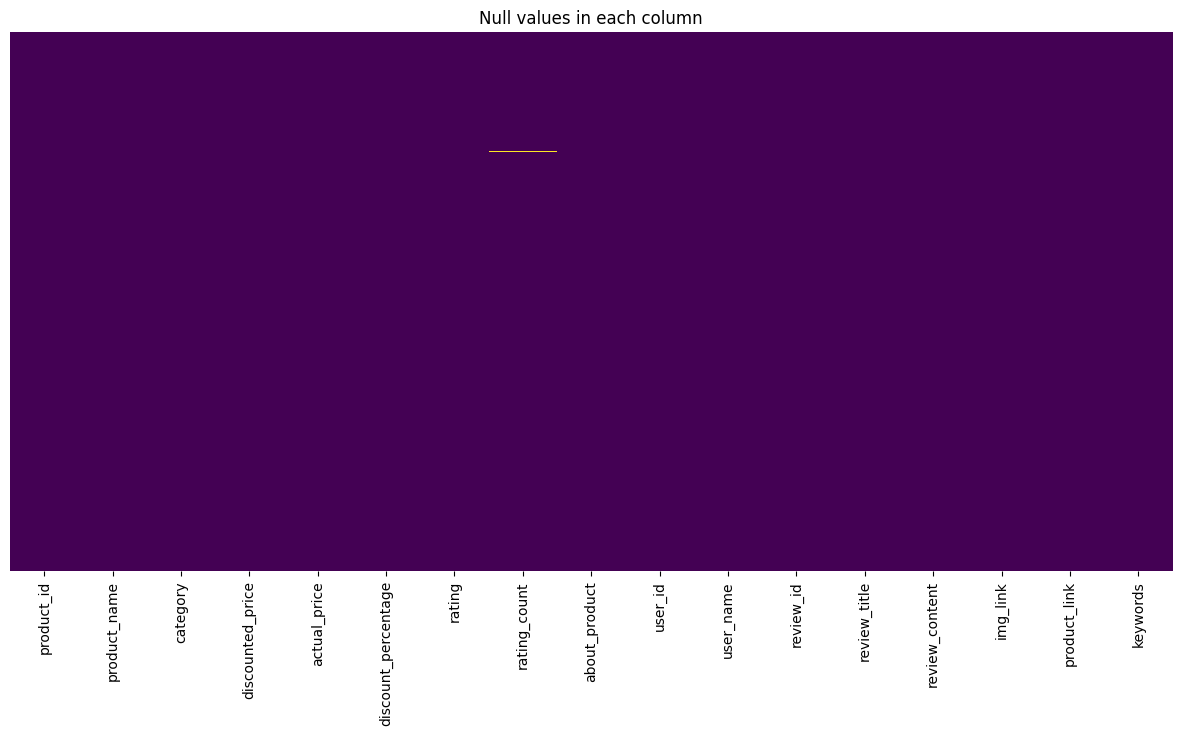

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.title("Null values in each column")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

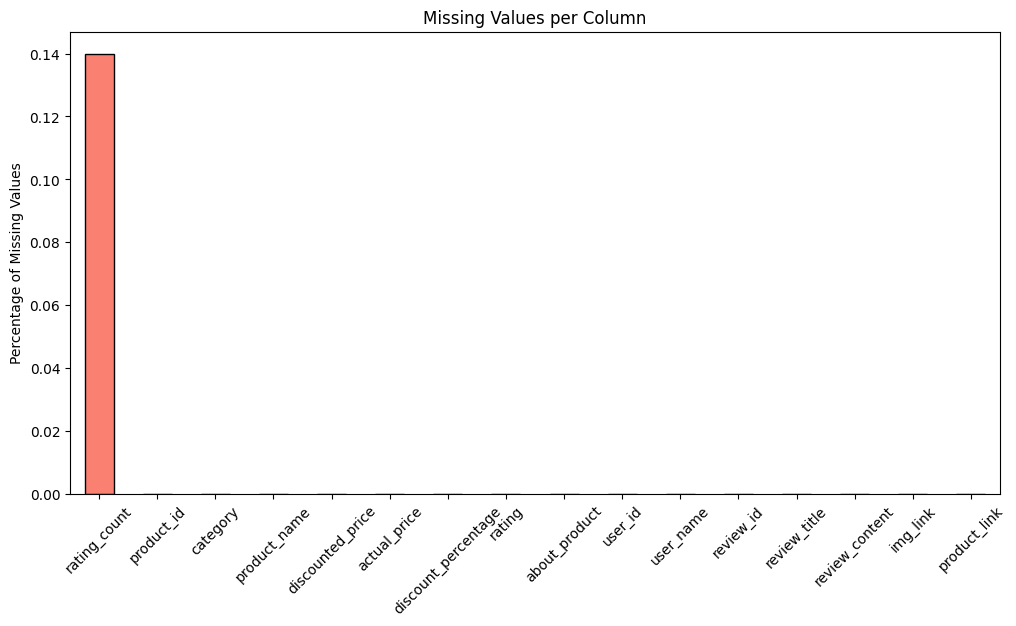

In [70]:
plt.figure(figsize=(12,6))
per.plot(kind='bar', color='salmon', edgecolor='black')
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values per Column")
plt.xticks(rotation=45)
plt.show()

In [71]:
df1[df1['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [72]:
df1['rating_count']=df1['rating_count'].fillna(df1['rating_count'].median())

In [73]:
#NO Duplicates  are present
df1.duplicated().sum()

np.int64(0)

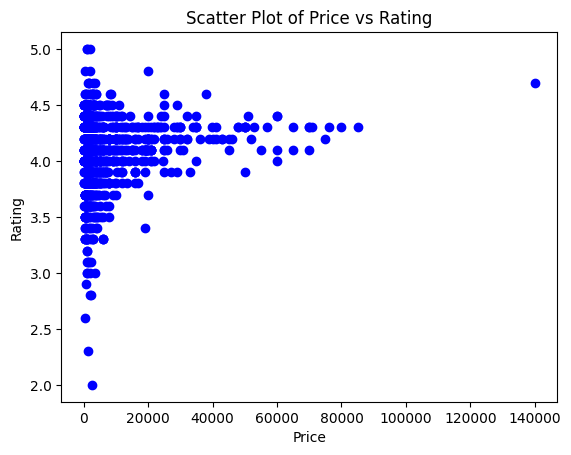

In [74]:

plt.scatter( df1['actual_price'],df1['rating'], color='blue')
plt.title('Scatter Plot of Price vs Rating')
plt.ylabel('Rating')
plt.xlabel('Price')
plt.show()

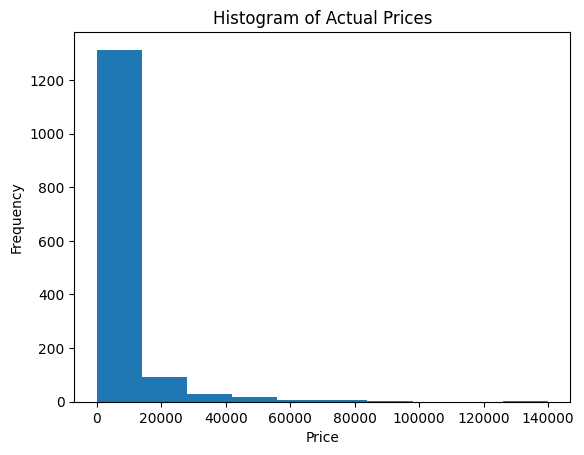

In [75]:
plt.hist(df1['actual_price'])
plt.title('Histogram of Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [76]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named df
categorical_cols = ['product_id', 'product_name', 'category',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

# Check the result
print(df1.head())


   product_id  product_name  category  discounted_price  actual_price  \
0         346          1158        10             399.0        1099.0   
1         848           134        10             199.0         349.0   
2         819          1023        10             199.0        1899.0   
3         643          1264        10             329.0         699.0   
4         588           829        10             154.0         399.0   

   discount_percentage  rating  rating_count  about_product  user_id  \
0                 0.64     4.2       24269.0            474      623   
1                 0.43     4.0       43994.0            279       88   
2                 0.90     3.9        7928.0           1250      849   
3                 0.53     4.2       94363.0           1010      254   
4                 0.61     4.2       16905.0           1189       17   

   user_name  review_id  review_title  review_content  img_link  product_link  
0        522        817           881           

In [77]:
df1.corr()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
product_id,1.000000,0.084089,-0.012565,0.206448,0.246733,0.289514,-0.149105,-0.175530,0.041404,0.065688,0.016145,-0.024282,0.007650,-0.046273,-0.078803,0.096205
product_name,0.084089,1.000000,-0.103778,0.090665,0.078567,0.101913,-0.035592,0.092450,0.158263,-0.024093,0.024598,0.013492,-0.060594,-0.018505,-0.060858,0.823725
category,-0.012565,-0.103778,1.000000,0.119365,0.122451,-0.314465,-0.109424,-0.098421,-0.038753,0.012707,0.037822,0.014015,0.004712,-0.012107,0.038850,-0.067710
discounted_price,0.206448,0.090665,0.119365,1.000000,0.961915,-0.242412,0.120386,-0.027081,0.052618,0.041731,-0.063069,-0.049757,-0.020981,-0.015904,0.018917,0.110186
actual_price,0.246733,0.078567,0.122451,0.961915,1.000000,-0.118098,0.121744,-0.035959,0.048529,0.041501,-0.049567,-0.045640,0.004521,-0.013948,0.020080,0.099286
discount_percentage,0.289514,0.101913,-0.314465,-0.242412,-0.118098,1.000000,-0.154563,0.011097,0.060846,0.008288,0.064618,0.022442,0.076043,0.005993,-0.011701,0.074548
rating,-0.149105,-0.035592,-0.109424,0.120386,0.121744,-0.154563,1.000000,0.101700,-0.036056,-0.014528,-0.012704,-0.134071,-0.075715,-0.044567,0.003993,-0.044125
rating_count,-0.175530,0.092450,-0.098421,-0.027081,-0.035959,0.011097,0.101700,1.000000,-0.030821,-0.094512,0.059160,-0.043089,-0.084239,-0.025268,-0.100781,0.003665
about_product,0.041404,0.158263,-0.038753,0.052618,0.048529,0.060846,-0.036056,-0.030821,1.000000,-0.001946,-0.004547,0.019690,-0.015824,-0.024567,0.030874,0.147208
user_id,0.065688,-0.024093,0.012707,0.041731,0.041501,0.008288,-0.014528,-0.094512,-0.001946,1.000000,-0.051368,0.001685,0.039035,0.031295,-0.014114,-0.008662


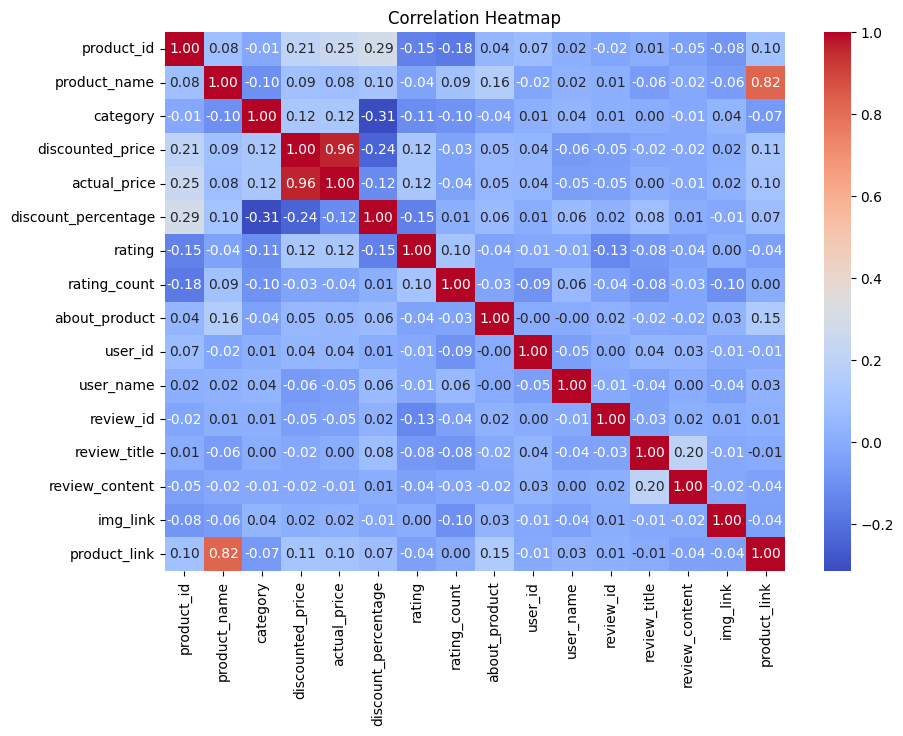

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Strong correlations:

discounted_price & actual_price → 0.96 (expected; discounted price closely tracks actual price)

product_name & product_link → 0.82 (each product name strongly linked to its URL)

Moderate correlations:

discount_percentage & discounted_price → -0.24 (higher discounts slightly lower discounted prices)

discount_percentage & category → -0.31 (some categories tend to have higher/lower discounts)

Weak / Low correlations:

Most other numeric and encoded categorical columns (ratings, user IDs, review IDs, about_product) show near-zero correlations, suggesting little linear relationship with price or category.

Negative correlations:

rating has slight negative correlations with product_id (-0.15) and rating_count (-0.17), but effects are minor.

Key takeaways:
Price relationships dominate; discounted_price and actual_price are highly correlated.

Category slightly impacts discount percentages.

User/review identifiers and text fields show little linear correlation with numeric product metrics; these may need other analysis approaches like clustering or text embeddings.

For modeling, focus on price features, discount, rating, and category as primary variables.

In [79]:
df1.corr(method='spearman')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
product_id,1.000000,0.083112,-0.013553,0.146237,0.269064,0.271879,-0.144268,-0.406559,0.041118,0.065228,0.016859,-0.024644,0.007415,-0.045763,-0.078258,0.095734
product_name,0.083112,1.000000,-0.106193,0.056597,0.105719,0.106467,-0.061395,0.128565,0.157675,-0.023810,0.024479,0.015269,-0.060779,-0.017671,-0.060212,0.823655
category,-0.013553,-0.106193,1.000000,0.360733,0.277291,-0.322090,-0.101758,-0.171893,-0.048319,0.015389,0.038735,0.016119,0.009407,-0.013519,0.042158,-0.065789
discounted_price,0.146237,0.056597,0.360733,1.000000,0.932787,-0.372991,0.079412,0.122296,-0.056144,0.079048,-0.018599,-0.048420,-0.018665,-0.053281,-0.021097,0.071049
actual_price,0.269064,0.105719,0.277291,0.932787,1.000000,-0.066363,0.033066,0.093400,-0.029216,0.086375,-0.001395,-0.045914,0.004687,-0.058924,-0.018511,0.111965
discount_percentage,0.271879,0.106467,-0.322090,-0.372991,-0.066363,1.000000,-0.144815,-0.096580,0.061906,0.005825,0.066214,0.012696,0.075222,0.012542,-0.010185,0.074625
rating,-0.144268,-0.061395,-0.101758,0.079412,0.033066,-0.144815,1.000000,0.180947,-0.033470,-0.000816,-0.014171,-0.130196,-0.067546,-0.054206,0.019161,-0.063169
rating_count,-0.406559,0.128565,-0.171893,0.122296,0.093400,-0.096580,0.180947,1.000000,-0.104660,-0.052821,0.021839,-0.050121,-0.033234,-0.024274,-0.074989,0.062640
about_product,0.041118,0.157675,-0.048319,-0.056144,-0.029216,0.061906,-0.033470,-0.104660,1.000000,-0.001770,-0.004390,0.020765,-0.015792,-0.025319,0.030514,0.146951
user_id,0.065228,-0.023810,0.015389,0.079048,0.086375,0.005825,-0.000816,-0.052821,-0.001770,1.000000,-0.051860,0.001674,0.038260,0.032042,-0.014201,-0.008345


In [80]:
cor=df1['actual_price'].corr(df1['rating'])
print(cor)

0.1217444960999836


In [81]:
import numpy as np
np.corrcoef(df1)

array([[ 1.        ,  0.99770767,  0.97382987, ..., -0.06376119,
         0.96904468,  0.83940958],
       [ 0.99770767,  1.        ,  0.96444021, ..., -0.08590614,
         0.96402407,  0.83007116],
       [ 0.97382987,  0.96444021,  1.        , ...,  0.03050197,
         0.96472621,  0.85461809],
       ...,
       [-0.06376119, -0.08590614,  0.03050197, ...,  1.        ,
         0.14242634,  0.46101104],
       [ 0.96904468,  0.96402407,  0.96472621, ...,  0.14242634,
         1.        ,  0.9325827 ],
       [ 0.83940958,  0.83007116,  0.85461809, ...,  0.46101104,
         0.9325827 ,  1.        ]])

In [82]:
gp=df1.groupby('category')['rating'].mean()

In [83]:
#Statistical Summary
gp.describe()

,rating
count,211.000000
mean,4.129868
std,0.233091
min,3.300000
25%,4.000000
50%,4.141667
75%,4.300000
max,4.600000


In [84]:
gp2=df1.groupby('review_content')['rating'].median()
print(gp2)

review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64


In [85]:
gp3=df1.groupby('product_name')['actual_price'].std()
gp3.count()

np.int64(98)

In [86]:

# Calculate the average ratings after ensuring numeric data type
average_ratings = df1.groupby("category")["rating"].mean().reset_index()

print(average_ratings)

     category    rating
0           0  3.800000
1           1  4.150000
2           2  3.500000
3           3  3.600000
4           4  4.050000
..        ...       ...
206       206  4.250000
207       207  4.150000
208       208  4.300000
209       209  4.133333
210       210  4.300000

[211 rows x 2 columns]


The output shows that most product categories have generally positive customer feedback, with average ratings above 3.50. However, some categories (e.g., 2 and 3) have lower ratings, suggesting potential areas for improvement. Further analysis of these categories could help identify specific reasons for lower feedback and identify potential solutions.



In [88]:
import pandas as pd

top_reviewed_per_category = (
    df1.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)


     product_id  product_name  category  discounted_price  actual_price  \
0           788           915         0            2339.0        4000.0   
1           830          1335         1             294.0        4999.0   
2           805           541         1             149.0         399.0   
3            25           477         2             649.0         999.0   
4           725           515         3             949.0        2000.0   
..          ...           ...       ...               ...           ...   
815          74           819       208             178.0         210.0   
816         412           786       209             120.0         120.0   
817          84           785       209             272.0         320.0   
818         239           784       209             341.0         450.0   
819          43           377       210             150.0         150.0   

     discount_percentage  rating  rating_count  about_product  user_id  \
0                   0.42 

/tmp/ipython-input-152056862.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "rating_count"))


The output highlights products likely to be popular within their categories based on high review counts, suggesting customer interest and engagement.
Review counts range from 9 to 15867, implying varying levels of attention and feedback across products.
Most listed products have ratings above 3.5, indicating a generally positive customer experience.
Products with the highest review counts within their categories might be considered potential top sellers, even without direct sales data.


<Axes: >

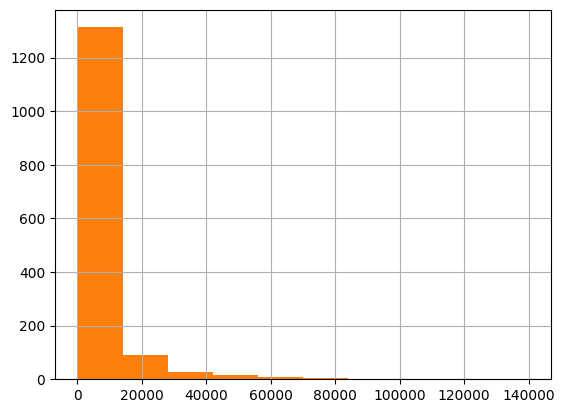

In [90]:
# Create histograms
df1["discounted_price"].hist(label="Discounted Price")
df1["actual_price"].hist(label="Actual Price")

# Calculate and analyze discount percentages
df1["discount_percentage"] = (df1["actual_price"] - df1["discounted_price"]) / df1["actual_price"] * 100
df1["discount_percentage"].describe()
df1["discount_percentage"].hist(label="Discount Percentage")


The output shows that discounted prices are generally lower than actual prices, with a median discounted price of 200 and a median actual price of 400.
The discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.
The output suggests that there may be opportunities to increase discounted prices or discount percentages to attract more customers.


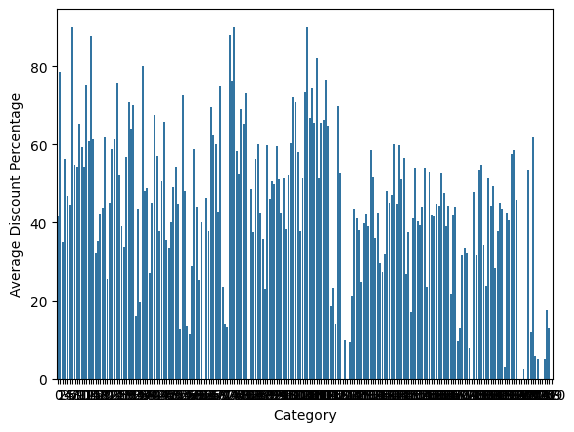

In [112]:
# Calculate average discount percentage per category
avg_discount_per_category = df1.groupby('category')['discount_percentage'].mean()

# Display results
#print(avg_discount_per_category)

# Optional: Visualization
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.show()

Average discount percentages vary widely across categories, ranging from 0% to 78.39%.
Categories 1 and 3 stand out with notably higher average discounts (78.39% and 56.34%), suggesting potential factors like clearance efforts, high competition, or lower-profit margins.
Categories 0, 206, 207, 210 have average discounts of 0%, indicating consistent pricing or strong demand for products within those categories.
Other categories exhibit varying discount percentages, likely reflecting diverse pricing strategies and market dynamics.



In [107]:
# Count occurrences of product names
product_counts = df["product_name"].value_counts()

# Sort in descending order and display top results
print(product_counts.sort_values(ascending=False).head(10))



product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)                         3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating             

Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.
Smart Watches and Charging Cables are the most popular product categories.
Multiple brands are represented, with boAt appearing twice.
Fast charging, durability, and functionality are key features.
Popularity is relatively evenly distributed beyond the leading product.




In [98]:
def extract_keywords(product_name):
  """Extracts keywords from a product name, handling potential numbers."""
  if isinstance(product_name, str):  # Check if it's a string
    keywords = product_name.lower().split()  # Split into words and lowercase
    keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
  else:
    keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
  return keywords

# Apply the function to extract keywords
df["keywords"] = df["product_name"].apply(extract_keywords)

# Flatten the list of keywords
all_keywords = [keyword for keywords in df["keywords"] for keyword in keywords]

# Count keyword occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 10 most popular keywords
print(keyword_counts.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


USB connectivity, charging (especially fast charging), and cables are prominent product features.
Prepositions and conjunctions like "with", "for", "and", "to" suggest a focus on explaining product compatibility and usage scenarios.
Cables and smart devices are likely well-represented in the dataset.
Product names tend to be concise and use common words, potentially benefiting from refined keyword extraction techniques.


In [100]:
df2=df.copy()

In [101]:
from textblob import TextBlob  # Import TextBlob library
# Select review column
df2[["product_id", "user_id", "review_content"]]

# Calculate sentiment score for each review
df2["sentiment"] = df2["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort by sentiment score (ascending for positive)
df_sorted = df2.sort_values(by="sentiment", ascending=True)

# Display top reviews based on a desired number (e.g., top 10)
top_reviews = df_sorted.head(10)
print(top_reviews)


      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN® Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             ₹399   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           

The overall sentiment scores are relatively low, suggesting a tendency towards neutral or slightly negative reviews in the sample.

The review with the highest sentiment score is "I have installed this in my kitchen working fine" (product_id 1463) with a score of -0.170167, indicating a mildly positive sentiment.

The review with the lowest sentiment score is "tv on off not working, so difficult to battery charge" (product_id 155) with a score of -0.600000, suggesting a strongly negative sentiment.

Several reviews mention issues with battery charging (product_id 155), product quality (product_id 1237), and ease of use (product_id 1198), highlighting potential areas for improvement.

Some reviews express both positive and negative aspects within the same text, like "Like and happy,,Please don't buy this heater" (product_id 1237), suggesting a nuanced evaluation of the product.

The user_id column seems to contain commas, indicating multiple user IDs for some reviews. This might need investigation to ensure accuracy.

Reviews for product_id 22, 152, and 723 have identical content, suggesting potential data duplication or errors.


In [103]:
# Calculate the correlation coefficient
correlation_coefficient = df1["discounted_price"].corr(df1["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")



Correlation between discounted_price and rating: 0.12


Discounted price and rating have a weak positive correlation. This means that products with higher discounted prices tend to have slightly higher ratings, but the relationship is not very strong.

In [104]:
# Group data by category and calculate average rating
average_ratings = df1.groupby("category")["rating"].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")


Top 5 categories with highest average ratings:
1. 57.0: 4.60
2. 48.0: 4.50
3. 62.0: 4.50
4. 38.0: 4.50
5. 81.0: 4.50


The top 5 categories have average ratings between 4.50 and 4.60, indicating overall positive customer satisfaction within these areas.
Most of the top-rated categories fall within technology-related domains, including tablets, networking devices, photography accessories, media streaming devices, and calculators.
Within broader categories like "Computers & Accessories" and "Electronics," specific subcategories emerge as particularly well-rated, such as tablets, powerline adapters, film accessories, and streaming clients.
Four categories share a rating of 4.50, suggesting similar levels of customer satisfaction across these areas.
The presence of "Basic Calculators" in the top 5 suggests that even relatively simple products can achieve high ratings if they meet customer needs effectively.


